# Installing Local Python Modules

When a module is not available globally, you can request it be installed for everyone, or you can install it locally.

* Install locally 
    * When you are only testing a module OR
    * When a module is not likely to be of use to others OR
    * When you need a newer version of a module than the globally-installed version

* Otherwise, request it to be installed globally.
 

## Publishing

Tools with locally-installed modules can still be published.  You will have to publish your notebook plus all the installed modules and/or binaries.


## Installation

The first step is to be sure you are in a new folder (directory).  Your installation will be in 
**lib**  and sometimes **bin** subdirectories.

In [17]:
!pwd

/home/nanohub/mmh/notebooks/jupyter_notebook_examples/examples/misc


Now we need to make sure to install for the correct version of python.  Remember how you can open either Python2 or Python3 notebooks?  Well the Jupyter server itself is launching those notebooks and if we use the bash shell to run a command, it will use that python version, which may not be the one your notebook is using.  So we use the "%%bash" cell magic.  This notebook is python 2 and the notebook server is running on python 3 (from 5.1 anaconda/jupyter release on). SO we have to do this:

In [10]:
%%bash -l 
use -e -r anaconda2-5.1

# check it
python --version

Python 2.7.14 :: Anaconda, Inc.


In [11]:
!python --version
# did not change the parent environment

Python 3.6.5 :: Anaconda, Inc.


## Installing Using Pip

The preferred method is to use pip.  I recommend adding "--upgrade-strategy only-if-needed" to the command line to prevent a lot of unnecessary stuff from being installed.
Set the prefix to "." to install in the local directory.

In [12]:
%%bash -l
use -e -r anaconda2-5.1
pip install wfdb --prefix=. --upgrade-strategy only-if-needed

  Running setup.py bdist_wheel for wfdb: started
  Running setup.py bdist_wheel for wfdb: finished with status 'done'
  Stored in directory: /home/nanohub/mmh/.cache/pip/wheels/e6/42/0f/ba2228d7a73ca828520fbde0c033e85b91c73825be3bf6e05e
Successfully built wfdb


mmtf-python 1.1.2 requires msgpack>=0.5.6, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
grin 1.2.1 requires argparse>=1.1, which is not installed.
jedi 0.12.0 has requirement parso>=0.2.0, but you'll have parso 0.1.1 which is incompatible.


## Didn't Work? Download then Install
We have a firewall that blocks many sites.  Pip looks up packages on pypi.org but the actual download can be from anywhere.  If it fails, the firewall probably did not allow the connection.  That's OK, you can still do it manually.

1. Go to https://pypi.org/ and search for your package
2. Download the version you want.  It will get saved to your computer.
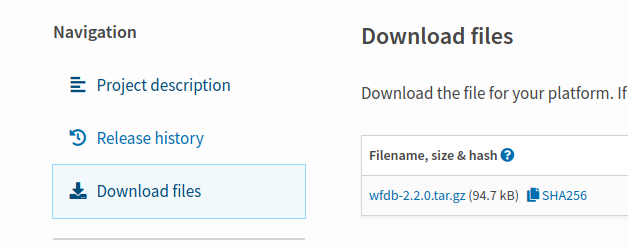
3. Now upload the file with Jupyter.  Select File/Open in your notebooks menu.  A new tab will be opened with the Jupyter file list.  CLick the "Upload" button and upload the package.
4. Now install

In [ ]:
%%bash -l
use -e -r anaconda2-5.1
pip install --prefix=. wfdb-2.2.0.tar.gz

In [13]:
!ls -lR 

.:
total 220
-rw-r----- 1 mmh public 38423 Jul  6 18:35 installing_python_modules.ipynb
drwxr-x--- 3 mmh public  4096 Jul  6 18:36 lib
-rw-r----- 1 mmh public   968 Jun 22 13:59 password_example.ipynb
-rw-r----- 1 mmh public 74315 Jun 19 22:41 Submit.ipynb
-rw-r----- 1 mmh public 94737 Jul  6 17:49 wfdb-2.2.0.tar.gz

./lib:
total 4
drwxr-x--- 3 mmh public 4096 Jul  6 18:36 python2.7

./lib/python2.7:
total 4
drwxr-x--- 5 mmh public 4096 Jul  6 18:36 site-packages

./lib/python2.7/site-packages:
total 12
drwxr-x--- 2 mmh public 4096 Jul  6 18:36 sklearn-0.0.dist-info
drwxr-x--- 5 mmh public 4096 Jul  6 18:36 wfdb
drwxr-x--- 2 mmh public 4096 Jul  6 18:36 wfdb-2.2.0.dist-info

./lib/python2.7/site-packages/sklearn-0.0.dist-info:
total 28
-rw-r----- 1 mmh public 401 Jul  6 18:35 DESCRIPTION.rst
-rw-r----- 1 mmh public   4 Jul  6 18:36 INSTALLER
-rw-r----- 1 mmh public 913 Jul  6 18:35 METADATA
-rw-r----- 1 mmh public 689 Jul  6 18:35 metadata.json
-rw-r----- 1 mmh public 566 Jul  6 18:36 

## Installing from Sources

Lets copy some sources from https://github.com/vossjo/ase-espresso

Instead of using "!", we can use cell magic "%%bash" to indicate all the commands in a cell are for bash.

In [ ]:
%%bash
git clone https://github.com/vossjo/ase-espresso
cd ase-espresso
# install in ".." because we are in the sources subdirectory
python setup.py install --prefix=..

In [ ]:
!ls -lR

## Setting Paths

You have your modules in the local directory.  Now you must tell your code to look there.  To do this, put the next two lines in every notebook.

In [14]:
import os,sys
sys.path.insert(0, 'lib/python2.7/site-packages')
# will be different for python3.

## Testing

Finally we test the module loading.  We will be extra careful and check that the full path the modules are loaded from.

In [15]:
import wfdb

In [16]:
wfdb.__path__

['lib/python2.7/site-packages/wfdb']

# Publishing

If you publish your work, you can either include a cell with the installation, or check in the installed modules as part of your tool.  Because that 